In [1]:
from __future__ import print_function
from __future__ import division
import scipy.stats as s
import math
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## Section 3

In [2]:
for N in (1,10,20):
    z = s.norm(loc=0, scale=1)
    mu = 10
    sigma = 1.0/math.sqrt(N)
    a = (10.5-mu)/sigma
    b = (9.5-mu)/sigma
    print("N is {}, probability is {}".format(N, z.cdf(a) - z.cdf(b)))

N is 1, probability is 0.38292492254802624
N is 10, probability is 0.8861537019933419
N is 20, probability is 0.9746526813225318


## Section 4

In [2]:
epsilon = 0.5
for N in (1,10,20):
    sigma = 1.0
    bound = 1 - 2*math.exp(-N*(epsilon**2)/(2*sigma**2))
    print("N is {}, lower bound is {}".format(N, bound))

N is 1, lower bound is -0.7649938051691909
N is 10, lower bound is 0.4269904062796198
N is 20, lower bound is 0.8358300027522024


# Question 4

## Section 1

In [3]:
std_norm = s.norm(loc=0, scale=1)
N = 100
alpha = 0.05
x_values = np.linspace(-6, 6, num=1000)

counter = 0
rounds = 1000
true_cdf = s.norm.cdf(x_values)
worst_error = -1
best_error = np.inf
for i in range(rounds):
    # Sample and define empirical cdf + CI
    random_samples = std_norm.rvs(size=N)
    empirical_cdf = lambda x: np.sum(random_samples.reshape(1, N)<x.reshape(x.size,1), axis=1)/N
    epsilon = np.sqrt(np.log(2/alpha)/(2*N))
    high_limit = lambda x: empirical_cdf(x) + epsilon
    low_limit = lambda x: empirical_cdf(x) - epsilon

    # Find best and worst cdf's
    error = np.max(np.abs(true_cdf - empirical_cdf(x_values)))
    if error > worst_error:
        worst_error = error
        worst_experience = empirical_cdf(x_values)
    if error < best_error:
        best_error = error
        best_experience = empirical_cdf(x_values)

    # Check if true cdf is in the CI
    is_below_high_limit = np.all(true_cdf < high_limit(x_values))
    is_above_low_limit = np.all(true_cdf > low_limit(x_values))
    is_in_limits = is_below_high_limit and is_above_low_limit
    counter += is_in_limits
print("True CDF was in limits on {}% of the time".format(100*counter/rounds))

True CDF was in limits on 96.0% of the time


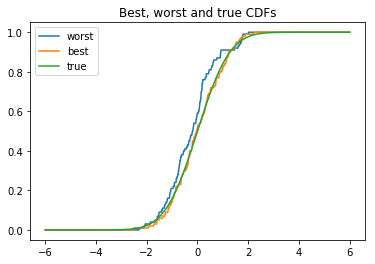

In [4]:
# Plot true CDF and best and worst empirical CDFs
plt.figure()
plt.plot(x_values, worst_experience, label='worst')
plt.plot(x_values, best_experience, label='best')
plt.plot(x_values, true_cdf, label='true')
plt.legend()
plt.title('Best, worst and true CDFs')
plt.show()

## Section 3

In [6]:
import pandas as pd
samsungData = pd.read_csv('samsungData.csv').drop(['Unnamed: 0'], axis=1)

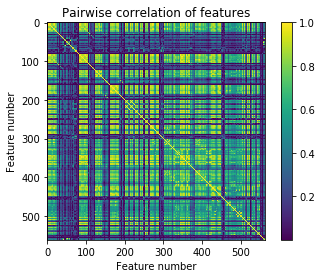

In [7]:
correlation = samsungData.corr().abs()
plt.figure()
plt.imshow(correlation)
plt.colorbar()
plt.xlabel("Feature number")
plt.ylabel("Feature number")
plt.title("Pairwise correlation of features")
plt.show()

## Section 4

In [18]:
x_features, y_features = np.where(np.array(correlation) == 1)
counter = 0
for x, y in zip(x_features, y_features):
    # Feature have a strong correlation to themselves, so skip displaying them
    if x == y:
        continue
    print(samsungData.keys()[x], samsungData.keys()[y],)
    counter +=1 
    
print("\nWe have %d features pairs with maximum correlation (=1)" % counter)


tBodyAccMag-mean() tBodyAccMag-sma()
tBodyAccMag-mean() tGravityAccMag-mean()
tBodyAccMag-mean() tGravityAccMag-sma()
tBodyAccMag-std() tGravityAccMag-std()
tBodyAccMag-mad() tGravityAccMag-mad()
tBodyAccMag-max() tGravityAccMag-max()
tBodyAccMag-min() tGravityAccMag-min()
tBodyAccMag-sma() tBodyAccMag-mean()
tBodyAccMag-sma() tGravityAccMag-mean()
tBodyAccMag-sma() tGravityAccMag-sma()
tBodyAccMag-energy() tGravityAccMag-energy()
tBodyAccMag-iqr() tGravityAccMag-iqr()
tBodyAccMag-entropy() tGravityAccMag-entropy()
tBodyAccMag-arCoeff()1 tGravityAccMag-arCoeff()1
tBodyAccMag-arCoeff()2 tGravityAccMag-arCoeff()2
tBodyAccMag-arCoeff()3 tGravityAccMag-arCoeff()3
tBodyAccMag-arCoeff()4 tGravityAccMag-arCoeff()4
tGravityAccMag-mean() tBodyAccMag-mean()
tGravityAccMag-mean() tBodyAccMag-sma()
tGravityAccMag-mean() tGravityAccMag-sma()
tGravityAccMag-std() tBodyAccMag-std()
tGravityAccMag-mad() tBodyAccMag-mad()
tGravityAccMag-max() tBodyAccMag-max()
tGravityAccMag-min() tBodyAccMag-min()
tGr

In [21]:
diff_1 = samsungData['tGravityAccMag-sma()'] - samsungData['tGravityAccMag-mean()']
diff_2 = samsungData['tBodyAccJerkMag-mean()'] - samsungData['tBodyAccJerkMag-sma()']
print("Max difference between tGravityAccMag-sma and tGravityAccMag-mean: %f" % np.max(np.abs(diff_1)))
print("Max difference between tGravityAccMag-sma and tGravityAccMag-mean: %f" % np.max(np.abs(diff_2)))

Max difference between tGravityAccMag-sma and tGravityAccMag-mean: 0.000000
Max difference between tGravityAccMag-sma and tGravityAccMag-mean: 0.000000


In [20]:
print("Some features are identical and therefore redundant")

Some features are identical and therefore redundant


## Section 5

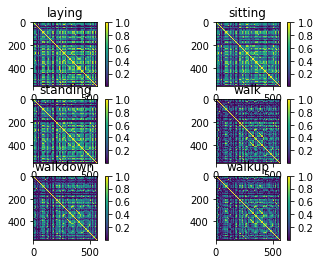

In [39]:
classes = np.unique(samsungData['activity'])
for i, cls in enumerate(classes):
    class_data = samsungData[samsungData['activity'] == cls]
    correlation = np.abs(class_data.corr())
    plt.subplot(3, 2, i + 1)
    plt.title(cls)
    plt.imshow(correlation)
    plt.colorbar()
plt.show()

## Section 6

The same features pairs with maximum correleation 1, still have the same correleation 1 per classes that contain them. Still many features are redundant.

## Section 7

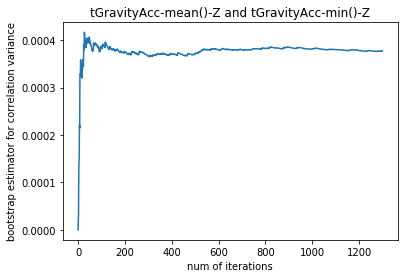

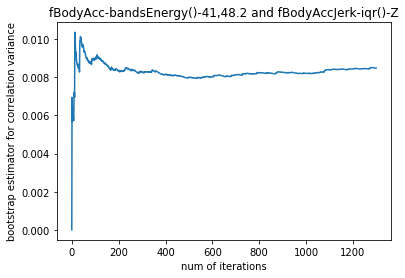

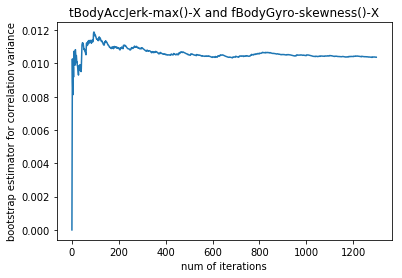

In [197]:
iterations = 1300
N = samsungData.shape[0]

pairs = [[42, 54],
        [335, 365],
        [89, 454]]


for [ind1, ind2] in pairs:
    feature_1 = np.array(samsungData[samsungData.columns[ind1]])
    feature_2 = np.array(samsungData[samsungData.columns[ind2]])
    correlations = np.zeros([iterations])
    correlations_std = np.zeros([iterations])
    correlations_sum = 0
    correlations_means = np.zeros([iterations])
    for i in range(iterations):
        rand_indexes = np.random.randint(0, N, [N])
        iter_features_1 = feature_1[rand_indexes]
        iter_features_2 = feature_2[rand_indexes]
        iter_features_1 = (iter_features_1-np.mean(iter_features_1))/np.std(iter_features_1)
        iter_features_2 = (iter_features_2-np.mean(iter_features_2))/np.std(iter_features_2)
        correlations[i] = np.mean(np.multiply(iter_features_1, iter_features_2))
        correlation = np.mean(np.multiply(iter_features_1, iter_features_2))
        correlations_sum += correlation
        correleations_mean = correlations_sum / (i+1)
        correlations_means[i] = correleations_mean
        correlations_std[i] = np.sqrt(np.mean((correlations[:i+1] - correleations_mean)**2))

    plt.figure()
    plt.plot(correlations_std)
    plt.xlabel('num of iterations')
    plt.ylabel('bootstrap estimator for correlation variance')
    plt.title("{} and {}".format(samsungData.columns[ind1], samsungData.columns[ind2]))
    plt.show()


